In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


## Polynomial Regression

In [3]:
a = pd.read_csv("EVS_Dataset.csv")
b = pd.DataFrame(a)
a['Month-Year'] = pd.to_datetime(a['Month-Year'], format='%d-%m-%Y')
a['Day'] = a['Month-Year'].dt.day
a['Month'] = a['Month-Year'].dt.month
a['Year'] = a['Month-Year'].dt.year
a = a.drop('Month-Year', axis=1)
a




,Rainfall Average,Average Temperature,Groundwater Levels,Day,Month,Year
0,11.626086,24.73871,2.08,1,1,2011
1,87.635759,25.58571,2.67,1,2,2011
2,0.000000,27.46129,2.94,1,3,2011
3,54.287100,29.48333,3.45,1,4,2011
4,10.951598,31.79032,3.69,1,5,2011
...,...,...,...,...,...,...
151,125.000000,30.12500,4.96,1,8,2023
152,120.000000,29.96666,4.51,1,9,2023
153,265.000000,29.54838,4.71,1,10,2023
154,310.000000,27.40000,3.10,1,11,2023


In [4]:
mean_value = a['Groundwater Levels'].mean()
a['Groundwater Levels'].fillna(mean_value, inplace=True)
a


,Rainfall Average,Average Temperature,Groundwater Levels,Day,Month,Year
0,11.626086,24.73871,2.08,1,1,2011
1,87.635759,25.58571,2.67,1,2,2011
2,0.000000,27.46129,2.94,1,3,2011
3,54.287100,29.48333,3.45,1,4,2011
4,10.951598,31.79032,3.69,1,5,2011
...,...,...,...,...,...,...
151,125.000000,30.12500,4.96,1,8,2023
152,120.000000,29.96666,4.51,1,9,2023
153,265.000000,29.54838,4.71,1,10,2023
154,310.000000,27.40000,3.10,1,11,2023


In [5]:
X = a.drop('Groundwater Levels', axis=1)
y = a['Groundwater Levels']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
degree = 2
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Create a pipeline that combines polynomial features and linear regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline.fit(xtrain, ytrain)


Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [7]:
ypred = pipeline.predict(xtest)
ypred

array([4.11751003, 4.61787144, 2.9111471 , 5.30254729, 5.59267702,
       4.62096063, 3.82936981, 4.39040686, 4.43646426, 5.57314647,
       4.36210804, 5.60321695, 3.74790278, 5.70464487, 2.84101338,
       4.52690796, 3.08475129, 5.85854817, 5.26695468, 5.37496631,
       4.54807532, 4.4911939 , 2.63355848, 3.33414496, 4.45076837,
       4.95413557, 4.55431098, 4.88879888, 4.3715179 , 4.17631729,
       3.61630035, 5.33477898])

In [8]:
poly_mse = mean_squared_error(ytest, ypred)
poly_r2 = r2_score(ytest, ypred)

print(f'Mean Squared Error: {poly_mse}')
print(f'R-squared: {poly_r2}')

Mean Squared Error: 0.5312522680547094
R-squared: 0.6135881416332477


## Linear Regression

In [9]:
a=pd.read_csv("EVS_Dataset.csv")
b=pd.DataFrame(a)
a['Month-Year'] = pd.to_datetime(a['Month-Year'], format='%d-%m-%Y')
a['Day'] = a['Month-Year'].dt.day
a['Month'] = a['Month-Year'].dt.month
a['Year'] = a['Month-Year'].dt.year
a = a.drop('Month-Year', axis=1)
a



,Rainfall Average,Average Temperature,Groundwater Levels,Day,Month,Year
0,11.626086,24.73871,2.08,1,1,2011
1,87.635759,25.58571,2.67,1,2,2011
2,0.000000,27.46129,2.94,1,3,2011
3,54.287100,29.48333,3.45,1,4,2011
4,10.951598,31.79032,3.69,1,5,2011
...,...,...,...,...,...,...
151,125.000000,30.12500,4.96,1,8,2023
152,120.000000,29.96666,4.51,1,9,2023
153,265.000000,29.54838,4.71,1,10,2023
154,310.000000,27.40000,3.10,1,11,2023


In [10]:
mean_value = a['Groundwater Levels'].mean()
print("Mean value:", mean_value)


Mean value: 4.350833333333333


In [11]:
a['Groundwater Levels'].fillna(mean_value, inplace=True)
print(a.to_string())

     Rainfall Average  Average Temperature  Groundwater Levels  Day  Month  Year
0           11.626086             24.73871                2.08    1      1  2011
1           87.635759             25.58571                2.67    1      2  2011
2            0.000000             27.46129                2.94    1      3  2011
3           54.287100             29.48333                3.45    1      4  2011
4           10.951598             31.79032                3.69    1      5  2011
5           73.990585             31.96667                4.01    1      6  2011
6          137.466619             30.20323                4.05    1      7  2011
7          202.763795             29.45806                4.31    1      8  2011
8          106.865185             29.30333                3.23    1      9  2011
9          185.982442             28.09677                2.92    1     10  2011
10         413.290582             26.13667                2.04    1     11  2011
11         147.466436       

In [12]:
X = a.drop('Groundwater Levels', axis='columns')
y = a['Groundwater Levels']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)


LinearRegression()

In [14]:
print(xtest.to_string())
print(ytest.to_string())

     Rainfall Average  Average Temperature  Day  Month  Year
96           0.000000             25.28387    1      1  2019
69          16.409937             29.33226    1     10  2016
82         538.198694             27.08333    1     11  2017
76          14.091811             33.10645    1      5  2017
114         87.049739             29.82258    1      7  2020
29          95.215198             31.00667    1      6  2013
94         167.701012             27.57333    1     11  2018
132        106.800000             25.24839    1      1  2022
93         171.823354             28.64516    1     10  2018
139        101.000000             30.20000    1      8  2022
19         107.737786             29.60323    1      8  2012
90          49.585058             31.87742    1      7  2018
15          42.247500             30.62000    1      4  2012
125         43.409055             30.89000    1      6  2021
24           0.000000             25.13548    1      1  2013
30         144.295123   

In [15]:
ypred = reg.predict(xtest)
ypred


array([3.89512107, 4.382312  , 3.18977937, 5.61733946, 4.99953721,
       4.40538123, 3.95247922, 4.13437773, 4.25139016, 5.32382176,
       3.84530223, 5.33470697, 4.28186247, 5.49296468, 3.06925426,
       3.85445573, 3.90471134, 5.99100746, 5.34773932, 4.95454806,
       5.09317197, 4.13936655, 2.85351293, 3.16889583, 3.7818438 ,
       4.59604504, 4.12368435, 4.35377734, 4.56649433, 4.57499824,
       3.4249621 , 5.98674565])

In [16]:
linear_mse = mean_squared_error(ytest, ypred)
linear_r2 = r2_score(ytest, ypred)

print(f'Mean Squared Error: {linear_mse}')
print(f'R-squared: {linear_r2}')

Mean Squared Error: 0.8215223406879807
R-squared: 0.4024571875853985


## Plots to compare the methods

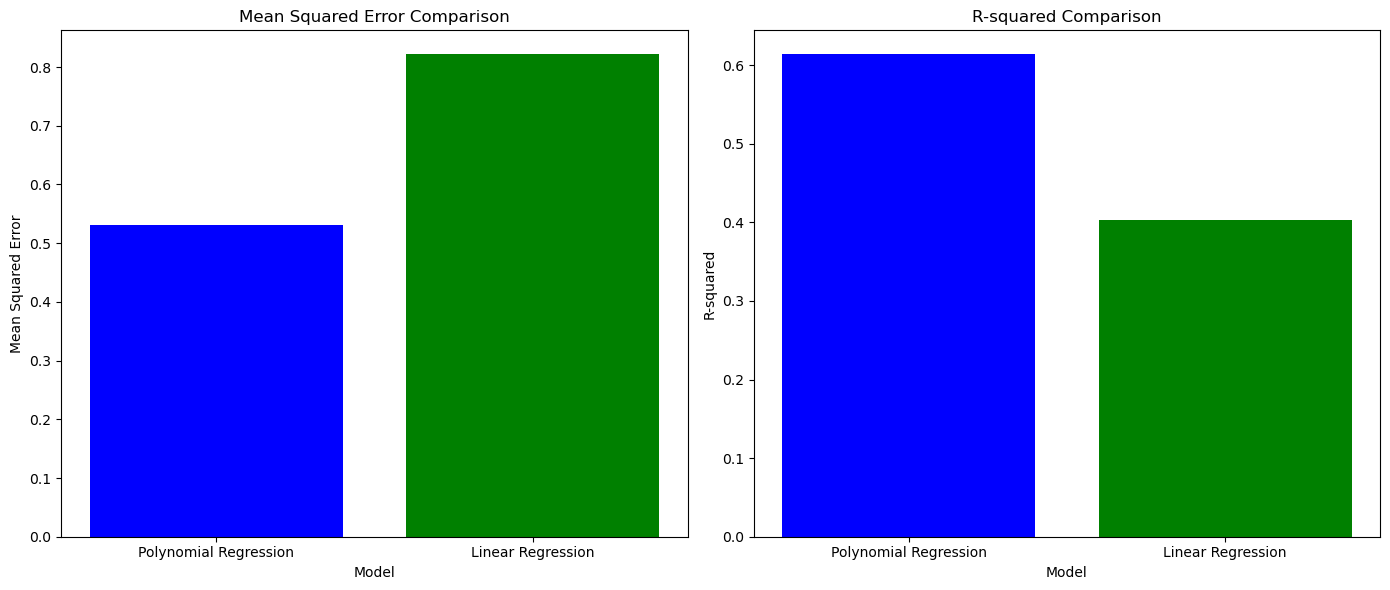

In [17]:
models = ['Polynomial Regression', 'Linear Regression']
mse_values = [poly_mse, linear_mse]
r2_values = [poly_r2, linear_r2]
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(models, mse_values, color=['blue', 'green'])
ax[0].set_title('Mean Squared Error Comparison')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Mean Squared Error')


ax[1].bar(models, r2_values, color=['blue', 'green'])
ax[1].set_title('R-squared Comparison')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R-squared')

plt.tight_layout()
plt.show()